In [5]:
import sys
!{sys.executable} -m pip install numpy matplotlib scikit-learn scipy seaborn nltk

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
data = pd.read_csv("abcnews-date-text.csv")
print(len(data))

print(data.columns)

data = data['headline_text'].drop_duplicates()


print(len(data))

85041
Index(['publish_date', 'headline_text'], dtype='object')
84754


In [10]:

# Punctiation to separate words for vecotrization
punctuation = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
# Words that are uninformative like 'and' 'or' 'but' 
stop_words = text.ENGLISH_STOP_WORDS.union(punctuation)


vectorizer = TfidfVectorizer(stop_words = stop_words)

X = vectorizer.fit_transform(data)


# Use predefined stemmers and tokenizers
stem = SnowballStemmer('english')
token = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    # Returns the array of stemmed words from the tokenized tevxt
    return [stem.stem(word) for word in token.tokenize(text.lower())]

vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)

X = vectorizer3.fit_transform(data)


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


In [11]:
words = vectorizer3.get_feature_names()
print(words)

['abbott', 'abc', 'aborigin', 'abus', 'accept', 'access', 'accid', 'accus', 'aceh', 'act', 'action', 'ad', 'address', 'adelaid', 'admit', 'affect', 'afghan', 'afl', 'africa', 'age', 'agre', 'agreement', 'ahead', 'aid', 'aim', 'air', 'airlin', 'airport', 'al', 'alcohol', 'alert', 'alic', 'alleg', 'allow', 'alp', 'ama', 'amp', 'anderson', 'anger', 'anim', 'announc', 'anoth', 'anti', 'appeal', 'appear', 'appoint', 'approv', 'area', 'arm', 'armi', 'arrest', 'arriv', 'arsenal', 'art', 'ask', 'assault', 'assur', 'asylum', 'athen', 'atsic', 'attack', 'attempt', 'attend', 'aussi', 'aust', 'australia', 'australian', 'author', 'avoid', 'await', 'award', 'away', 'babi', 'bad', 'baghdad', 'bail', 'bali', 'ban', 'bangladesh', 'bank', 'base', 'battl', 'bay', 'beach', 'beat', 'beatti', 'beckham', 'becom', 'beef', 'befor', 'begin', 'bendigo', 'benefit', 'best', 'better', 'bid', 'big', 'bird', 'black', 'blair', 'blame', 'blast', 'blaze', 'block', 'blow', 'blue', 'board', 'boat', 'bodi', 'bomb', 'bomber

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


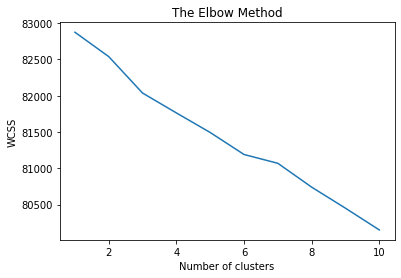

For n_clusters = 6 The average silhouette_score is : 0.013263274351598254
For n_clusters = 7 The average silhouette_score is : 0.014566930171590036
For n_clusters = 8 The average silhouette_score is : 0.015413881100584411
For n_clusters = 9 The average silhouette_score is : 0.015029345603562429
For n_clusters = 10 The average silhouette_score is : 0.017723629273026047


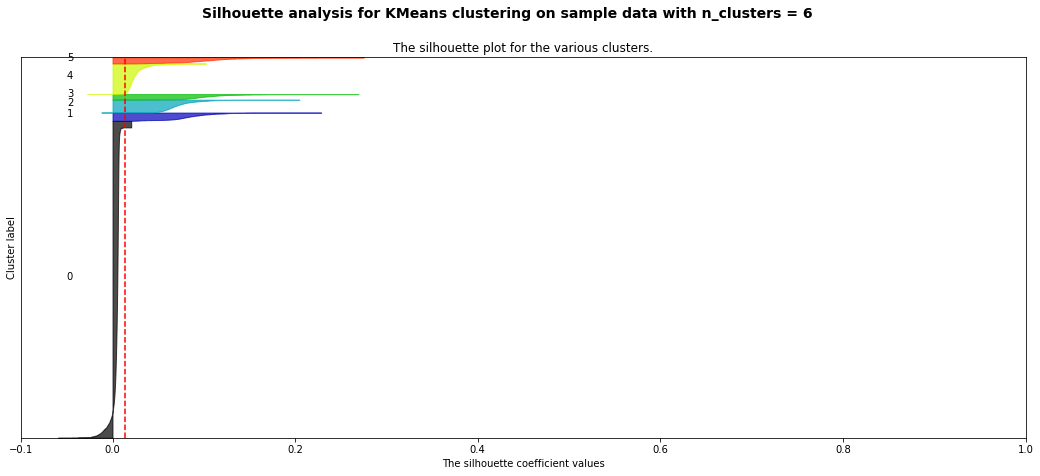

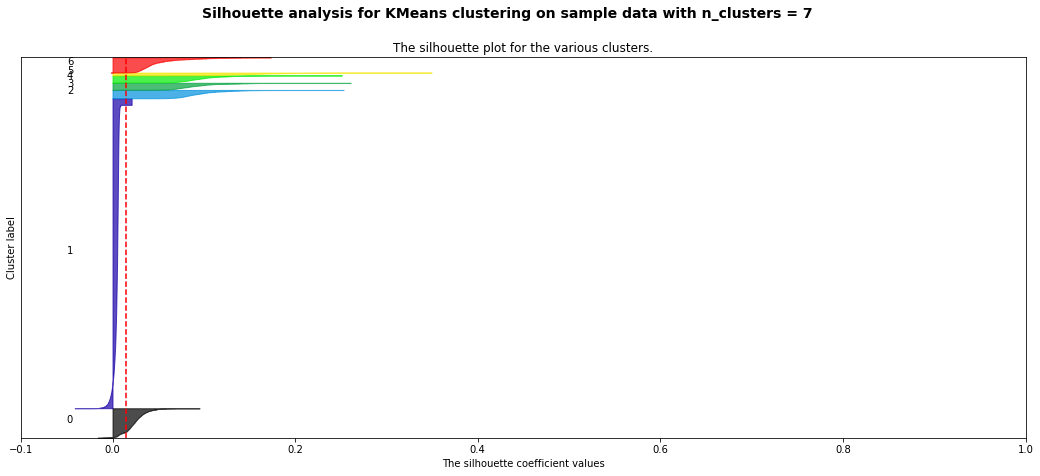

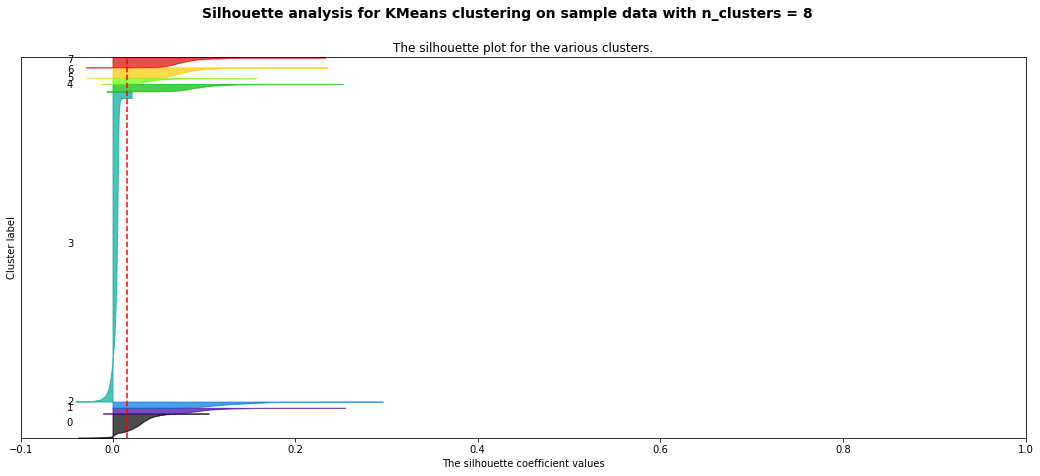

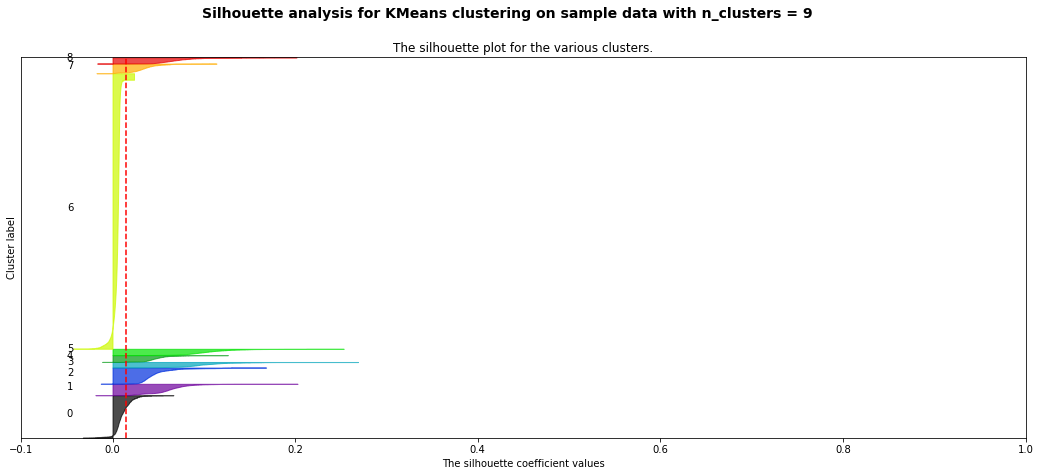

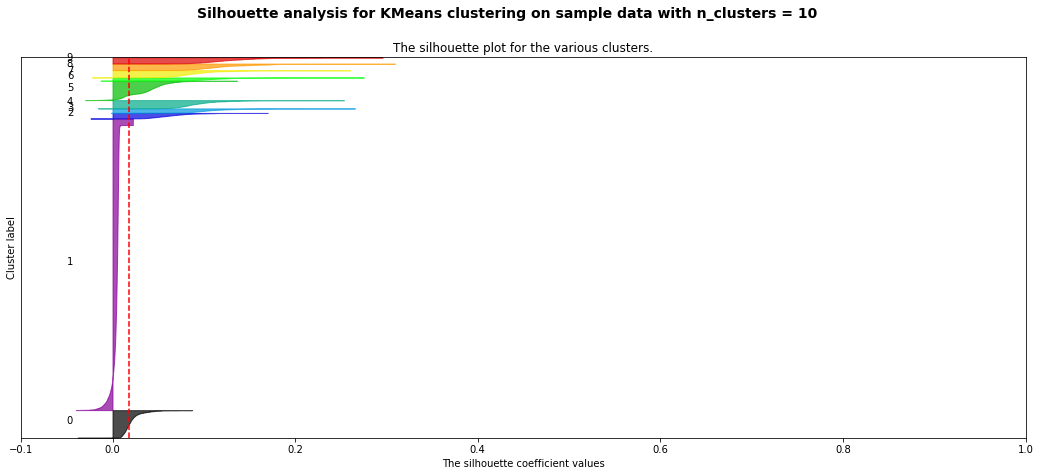

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,n_init=4,max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(6, 11)

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-.1, 0.5])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters,n_init=4, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels=cluster_labels)
    
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    max_size_cluster = 0
    bigest_size_index = 0
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        if size_cluster_i > max_size_cluster:
            max_size_cluster = size_cluster_i
            bigest_size_index = i

        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



**Running K-Means with K=10 TF-IDF**

In [13]:

kmeans = KMeans(n_clusters = 10, n_init = 20)
kmeans.fit(X)

# Finally, we look at 8 the clusters generated by k-means. Show the top 25 words in each cluster 
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : plan, govt, council, urg, fund, consid, nsw, vic, wa, reject, fed, water, sa, qld, merger, local, say, develop, boost, seek, chang, meet, support, claim, public
1 : report, highlight, iraq, releas, govt, case, sar, death, kill, new, polic, say, council, reject, iraqi, claim, bomb, urg, china, attack, profit, deni, iran, arrest, blast
2 : polic, probe, investig, miss, man, search, arrest, death, murder, seek, shoot, hunt, car, drug, fatal, help, road, victim, attack, suspect, wa, stab, sydney, raid, offic
3 : new, zealand, law, year, plan, council, govt, set, chief, appoint, open, launch, polic, centr, announc, hope, presid, sign, deal, home, servic, test, record, help, station
4 : win, award, titl, stage, cup, tour, open, world, seri, lead, record, claim, battl, m, score, contract, australia, second, south, gold, elect, way, aussi, england, tiger
5 : say, kill, warn, claim, man, fund, urg, set, world, boost, open, lead, cup, continu, australia, water, hospit, face, death, attack, g

From looking at the 10 clusters created from TF-IDF vectorizations, the cluster topics appear to be as follows
1. Governmnet planning and funding
2. Foreign policy
3. Criminal investigations
4. Government positions
5. Sports
6. Public health
7. Serious crimes
8. Accidents
9. War and foreign relations
10. Sports

In [16]:
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0  5990]
 [    1  1228]
 [    2  2990]
 [    3  2274]
 [    4  1441]
 [    5 64314]
 [    6  2627]
 [    7  1617]
 [    8  1607]
 [    9   666]]


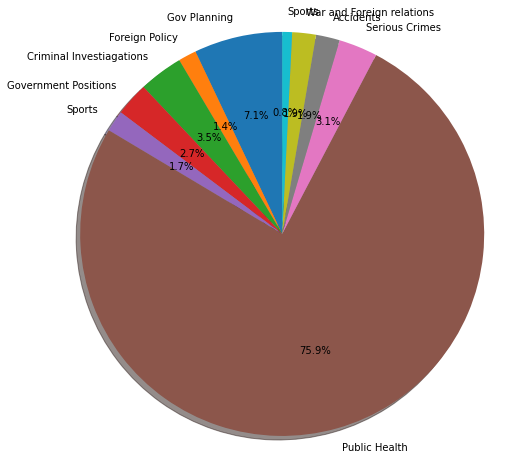

In [19]:
labels = ['Gov Planning', 'Foreign Policy', 'Criminal Investiagations', 'Government Positions', 'Sports','Public Health','Serious Crimes','Accidents','War and Foreign relations','Sports']

sizes = [5990, 1228, 2990, 2274,1441,64314,2627,1617,1607,666]


fig1, ax1 = plt.subplots()
fig1.set_figheight(8)
fig1.set_figwidth(8)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**K-Means Word2Vec**